In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(f'../dataset/TPE_model_features.csv')

In [3]:
data_class = pd.get_dummies(data['鄉鎮市區'])
#data = data.loc[data['鄉鎮市區'] == '士林區']
data_class.columns = ['鄉鎮市區_' + str(x) for x in data_class.columns]
data = pd.concat([data, data_class], axis = 1)
print(data.shape[1])

93


In [4]:
#data.insert(105, 'y', data['單價元平方公尺'])
data.insert(data.shape[1], 'y', data['單價元平方公尺'])
data.drop(['單價元平方公尺'],axis=1,inplace=True)
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.drop(['Unnamed: 0.1'],axis=1,inplace=True)
data.drop(['鄉鎮市區'],axis=1,inplace=True)
data.drop(['建物型態'],axis=1,inplace=True)
data.drop(['車位類別'],axis=1,inplace=True)
data.drop(['geometry'],axis=1,inplace=True)

In [5]:
data = data.loc[:, data.std() > 0]
data = data.dropna()

In [6]:
data.head()

,交易年份,屋齡,交易標的,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,電梯,floor,車位類別-坡道平面,車位類別-坡道機械,...,PARKING_AREA_250,PARKING_AREA_500,PARKING_AREA_750,STOP_COUNT_250,STOP_COUNT_500,STOP_COUNT_750,NEAR_MRT_250,NEAR_MRT_500,NEAR_MRT_750,y
23,108,43.0,0,4,2,2,0,4,0.0,0.0,...,0.000000,0.000000,0.000000,13.0,17.0,25.0,0,0,0,100078
24,108,34.0,0,4,2,2,1,6,0.0,0.0,...,816.089690,3922.227574,20099.693731,10.0,23.0,50.0,0,0,0,143939
25,107,13.0,1,5,2,3,1,9,0.0,1.0,...,2236.179622,15026.427024,30117.849780,5.0,32.0,46.0,0,1,1,289600
26,107,10.0,0,1,1,1,1,4,0.0,0.0,...,5278.512991,13429.280786,38657.412524,6.0,17.0,32.0,1,1,1,252911
27,108,2.0,1,2,2,2,1,5,0.0,0.0,...,1892.315417,13684.755547,27492.668933,9.0,26.0,49.0,0,0,0,269596


In [7]:
feature_count = data.shape[1]
print(feature_count)

81


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [10]:
data_norm = scaler.transform(data)
pd.DataFrame(data_norm).describe()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
count,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,...,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03,4.182000e+03
mean,2.969940e-15,8.665155e-17,-4.077720e-17,-9.854490e-17,-1.478174e-16,3.398100e-17,1.422954e-17,5.946675e-17,5.606865e-17,4.587435e-17,...,-4.757340e-17,-9.174870e-17,6.796200e-17,6.286485e-17,2.412651e-16,2.769452e-16,3.398100e-18,-2.718480e-17,4.884769e-17,-2.378670e-17
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,...,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-5.642633e+00,-1.939087e+00,-6.236244e-01,-2.039424e+00,-2.402665e+00,-1.814639e+00,-9.871698e-01,-9.979569e-01,-4.919911e-01,-1.524613e-01,...,-7.867808e-01,-1.301823e+00,-1.527138e+00,-2.020971e+00,-3.415452e+00,-2.976890e+00,-2.974821e-01,-5.065674e-01,-7.250659e-01,-1.682467e+00
25%,-9.796501e-01,-8.149169e-01,-6.236244e-01,-5.689290e-01,3.822422e-01,-7.720755e-01,-9.871698e-01,-7.111609e-01,-4.919911e-01,-1.524613e-01,...,-7.072765e-01,-7.446682e-01,-5.971244e-01,-5.230401e-01,-8.590698e-01,-8.190295e-01,-2.974821e-01,-5.065674e-01,-7.250659e-01,-5.493356e-01
50%,-4.705353e-02,3.092527e-01,-6.236244e-01,1.663185e-01,3.822422e-01,2.704882e-01,-9.871698e-01,-1.375688e-01,-4.919911e-01,-1.524613e-01,...,-3.058418e-01,-1.329751e-01,-2.004738e-01,3.868402e-02,-1.286749e-01,2.129907e-01,-2.974821e-01,-5.065674e-01,-7.250659e-01,-2.032341e-01
75%,8.855430e-01,6.839759e-01,1.603529e+00,1.663185e-01,3.822422e-01,2.704882e-01,1.012997e+00,1.492272e-01,-4.919911e-01,-1.524613e-01,...,3.736569e-01,4.874809e-01,4.863686e-01,6.004082e-01,7.843187e-01,7.759109e-01,-2.974821e-01,-5.065674e-01,1.379185e+00,2.943293e-01
max,1.818140e+00,4.243846e+00,1.603529e+00,1.045978e+01,1.012942e+01,1.069613e+01,1.012997e+00,9.326700e+00,2.032557e+00,6.559044e+00,...,6.656022e+00,3.879506e+00,3.386749e+00,3.221787e+00,2.975503e+00,2.089391e+00,3.361547e+00,1.974071e+00,1.379185e+00,1.827345e+01


In [11]:
#X = data_norm[:,0:115]
#y = data_norm[:,115]
X = data_norm[:,0:feature_count-1]
y = data_norm[:,feature_count-1]

In [12]:
print(X)

[[-0.97965005  0.74642973 -0.62362436 ... -0.29748206 -0.50656745
  -0.72506589]
 [-0.97965005  0.18434494 -0.62362436 ... -0.29748206 -0.50656745
  -0.72506589]
 [-1.91224657 -1.12718626  1.60352941 ... -0.29748206  1.97407079
   1.37918501]
 ...
 [-0.04705353  1.43342226 -0.62362436 ... -0.29748206 -0.50656745
  -0.72506589]
 [-0.04705353  1.1836068  -0.62362436 ... -0.29748206  1.97407079
   1.37918501]
 [-0.04705353  0.4341604   1.60352941 ... -0.29748206 -0.50656745
   1.37918501]]


In [13]:
print(y)

[-0.98500282 -0.49608666  1.1275885  ... -0.6112346  -0.73426344
 -0.90964947]


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.neural_network import MLPRegressor

In [17]:
model_mlp = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=(int(data.shape[1]*2/3),int(data.shape[1]*1/3)))
model_mlp.fit(X_train, y_train)
mlp_score=model_mlp.score(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
print('score:',mlp_score)
result = model_mlp.predict(X_test)

score: 0.9810509792885741


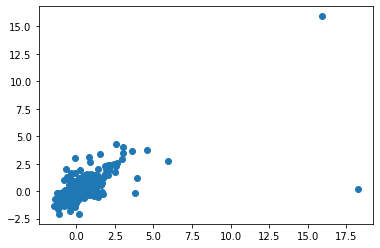

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, result)
plt.plot([0,1],[0,1])

In [20]:
data1 = pd.DataFrame({'origin':y_test,'predict':result})
data1.corr()

,origin,predict
origin,1.000000,0.720078
predict,0.720078,1.000000


In [23]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
print(f"mean_absolute_error: {mean_absolute_error(y_test, result)}")
print(f"explained_variance_score: {explained_variance_score(y_test, result)}")
# mean_squared_error
print(f"mean_squared_error: {mean_squared_error(y_test, result)}")
print(f"r2_score: {r2_score(y_test, result)}")

mean_absolute_error: 0.3521168720299444
explained_variance_score: 0.5028316850224568
mean_squared_error: 0.6569311182826018
r2_score: 0.5025472678689464
